# Sixt Data Science Lab - Test Task for Data Scientist Job Candidates

## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and vizalizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data from UCI Repository and put it into the same folder with the notebook. The link to it is https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset . Here is an available mirror in case the above website is down: https://data.world/uci/bike-sharing-dataset
3. We split the data into two parts. One dataset containing the last 30 days and one dataset with the rest.

In [144]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# # read raw data

df_hour = pd.read_csv('data/bike+sharing+dataset (2)/hour.csv')


df_day = pd.read_csv('data/bike+sharing+dataset (2)/day.csv')

# split dataset
df_last30 = df_day.tail(30)
df = df_day.iloc[:-30, :]

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Part 2 - Data Processing and Analysis

**Tasks:**
1. Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. Visualise rentals of bikes per day.
3. Assume that each bike has exactly maximum 12 rentals per day.
    * Find the maximum number of bicycles `nmax` that was needed in any one day.
    * Find the 95%-percentile of bicycles `n95` that was needed in any one day.
5. Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)


## EDA: Day Dataset

### 1. Load & Clean the Data

- No null values found in the day dataset
-  Two columns with outlier % more than 2.5% : 
   -  'holiday': (2.85),
   - 'casual': (5.14)

In [145]:
print(df_day.shape, "\n")

(731, 16) 



In [146]:
print("dtypes info ", df_day.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
dtypes info  None 



In [147]:
print("Null value count", df_day.isnull().sum())


Null value count instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [148]:

import pandas as pd

# Example: Load your dataset
# df = pd.read_csv('your_file.csv')

# df = df_day

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_percentages = {}
columns_above_threshold = {}
threshold = 2

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers for this column
    col_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    total_values = df[col].notnull().sum()
    
    outlier_percentages[col] = (col_outliers / total_values) * 100
    
    if outlier_percentages[col] > threshold:
        columns_above_threshold[col] = round((col_outliers / total_values) * 100, 2)

# Display results
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct:.2f}% outliers")
    
    
print("\n" ,"Outliers % above 2%")

columns_above_threshold

instant: 0.00% outliers
season: 0.00% outliers
yr: 0.00% outliers
mnth: 0.00% outliers
holiday: 2.85% outliers
weekday: 0.00% outliers
workingday: 0.00% outliers
weathersit: 0.00% outliers
temp: 0.00% outliers
atemp: 0.00% outliers
hum: 0.29% outliers
windspeed: 1.71% outliers
casual: 5.14% outliers
registered: 0.00% outliers
cnt: 0.00% outliers

 Outliers % above 2%


{'holiday': np.float64(2.85), 'casual': np.float64(5.14)}

In [149]:

plt.style.use('ggplot')
df.drop('cnt',axis=1).describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,351.000000,2.479315,0.479315,6.285307,0.028531,3.004280,0.684736,1.385164,0.502732,0.480847,0.625717,0.190534,866.937233,3661.104137
std,202.505555,1.090839,0.499929,3.329294,0.166602,2.003207,0.464953,0.542489,0.182781,0.162584,0.141988,0.076740,693.470674,1553.467783
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000
25%,176.000000,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.343478,0.348470,0.519167,0.134958,317.000000,2507.000000
50%,351.000000,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.514167,0.503146,0.623750,0.182221,738.000000,3656.000000
75%,526.000000,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.613025,0.728750,0.233221,1135.000000,4739.000000
max,701.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000


In [150]:

import pandas as pd

# Example: Load your dataset
# df = pd.read_csv('your_file.csv')

threshold = 1 
# Outlier percentage threshold
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

columns_above_threshold = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    col_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    total_values = df[col].notnull().sum()
    
    outlier_pct = (col_outliers / total_values) * 100
    
    if outlier_pct > threshold:
        columns_above_threshold.append(col)

print("Columns with outlier percentage > 2.5%:")


Columns with outlier percentage > 2.5%:


In [151]:
# TODO: your code comes here
# 1. Find the maximum number of bicycles `nmax` that was needed in any one day.
# 2. Find the 95%-percentile of bicycles `n95` that was needed in any one day.

In [152]:
df['cnt'].describe()


count     701.000000
mean     4528.041369
std      1939.766889
min        22.000000
25%      3194.000000
50%      4541.000000
75%      6041.000000
max      8714.000000
Name: cnt, dtype: float64

Maximum bikes in a day (nmax): 8714
95th percentile bikes in a day (n95): 7582.0


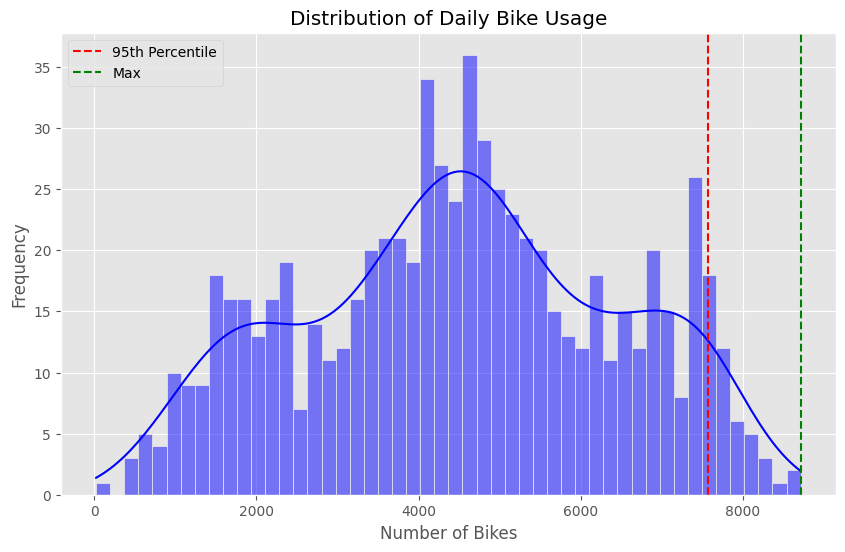

In [153]:
nmax = df['cnt'].max()
n95 = df['cnt'].quantile(0.95)

print(f"Maximum bikes in a day (nmax): {nmax}")
print(f"95th percentile bikes in a day (n95): {n95}")

# Plot

# Plot distribution curve
plt.figure(figsize=(10,6))
sns.histplot(df_day["cnt"], bins=50, kde=True, color='blue')  # Histogram + KDE curve
plt.axvline(df_day["cnt"].quantile(0.95), color='red', linestyle='--', label='95th Percentile')
plt.axvline(df_day["cnt"].max(), color='green', linestyle='--', label='Max')
plt.title('Distribution of Daily Bike Usage')
plt.xlabel('Number of Bikes')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [154]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
daily_rentals = df.groupby('dteday')['cnt'].sum()
# print(daily_rentals)

# Assume each bike can have max 12 rentals per day
df_day['bikes_cnt'] = round(df_day['cnt'] / 12)

# Maximum number of bicycles needed (nmax)
nmax_bike = df_day['bikes_cnt'].max()

# 95th percentile of bicycles needed (n95)
n95_bike = df_day['bikes_cnt'].quantile(0.95)

print(f"Maximum bikes needed (nmax): {nmax_bike:.0f}")
print(f"95th percentile bikes needed (n95): {n95_bike:.0f}")

Maximum bikes needed (nmax): 726
95th percentile bikes needed (n95): 632


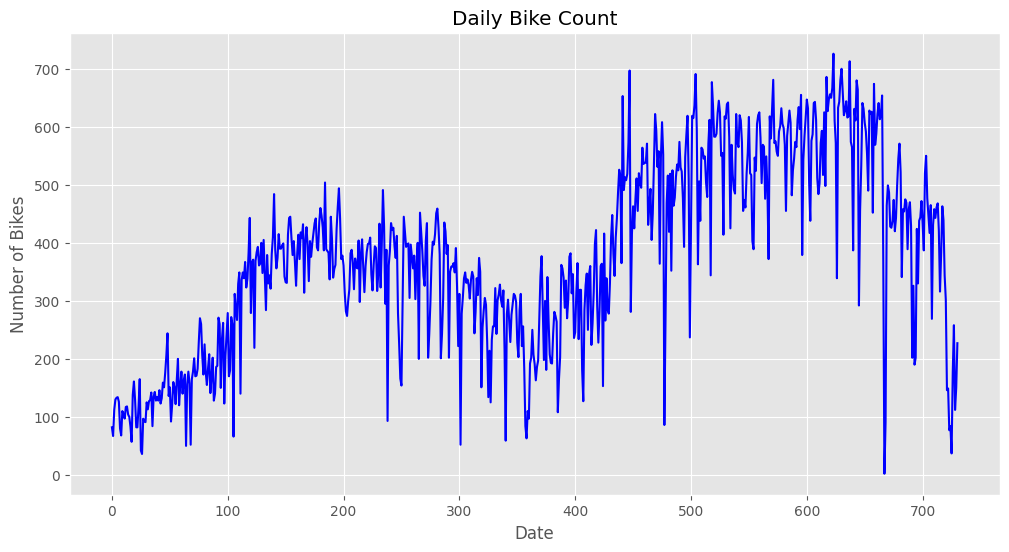

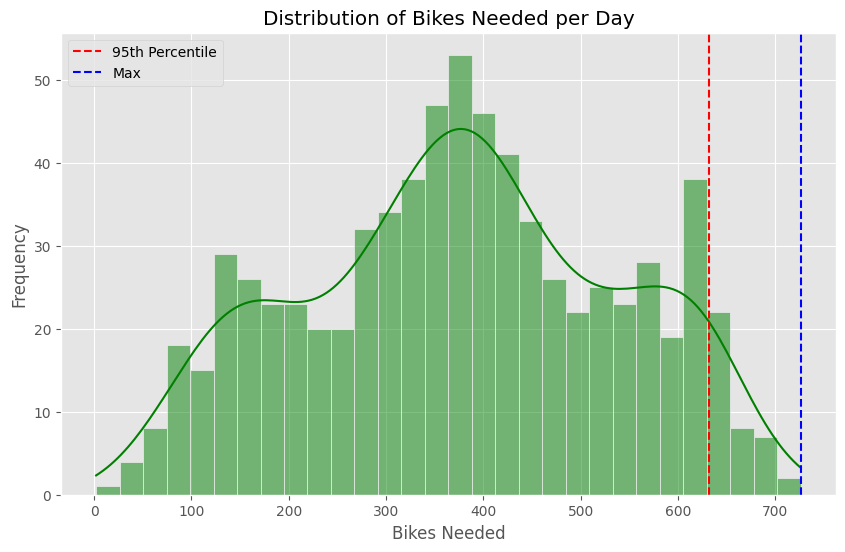

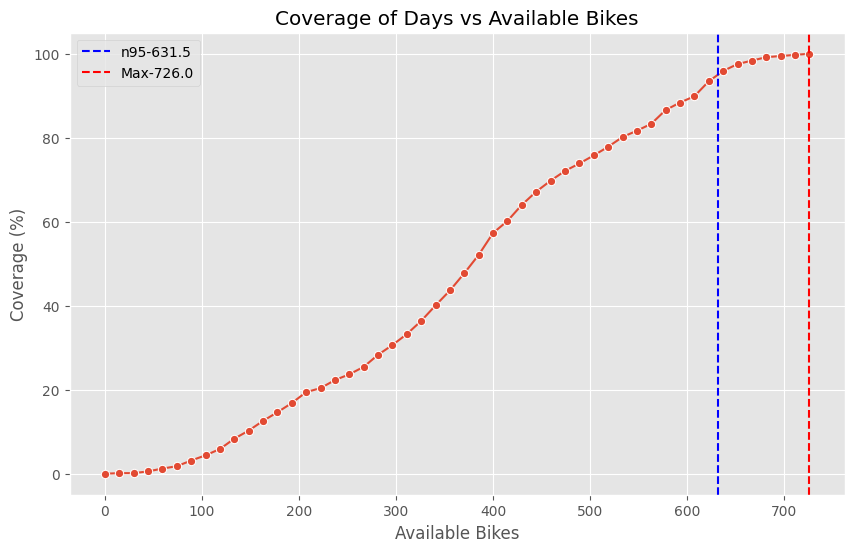

In [156]:
# -----------------------------
# 3. Visualize rentals per day
# -----------------------------
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_day['bikes_cnt'].index, y=df_day['bikes_cnt'].values, color='blue')
plt.title('Daily Bike Count')
plt.xlabel('Date')
plt.ylabel('Number of Bikes')
plt.show()

# -----------------------------
# 4. Distribution of bikes needed
# -----------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df_day['bikes_cnt'], bins=30, kde=True, color='green')
plt.axvline(n95_bike, color='red', linestyle='--', label='95th Percentile')
plt.axvline(nmax_bike, color='blue', linestyle='--', label='Max')
plt.title('Distribution of Bikes Needed per Day')
plt.xlabel('Bikes Needed')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# -----------------------------
# 5. Coverage curve
# -----------------------------
thresholds = np.linspace(0, nmax_bike, 50)
coverage = [(t, (df_day['bikes_cnt'] <= t).mean() * 100) for t in thresholds]
coverage_df = pd.DataFrame(coverage, columns=['Available Bikes', 'Coverage (%)'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=coverage_df, x='Available Bikes', y='Coverage (%)', marker='o')
plt.title('Coverage of Days vs Available Bikes')
plt.xlabel('Available Bikes')
plt.ylabel('Coverage (%)')
plt.axvline(n95_bike, color='blue', linestyle='--', label=f'n95-{n95_bike}')
plt.axvline(nmax_bike, color='red', linestyle='--', label=f'Max-{nmax_bike}')
plt.legend()
plt.show()


In [157]:
coverage_df

,Available Bikes,Coverage (%)
0,0.000000,0.000000
1,14.816327,0.136799
2,29.632653,0.136799
3,44.448980,0.547196
4,59.265306,1.231190
5,74.081633,1.778386
6,88.897959,3.146375
7,103.714286,4.377565
8,118.530612,5.882353
9,133.346939,8.344733


/var/folders/_4/kyhrjqh97571rhyj62w1kdwr0000gn/T/ipykernel_77542/975408208.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Month')


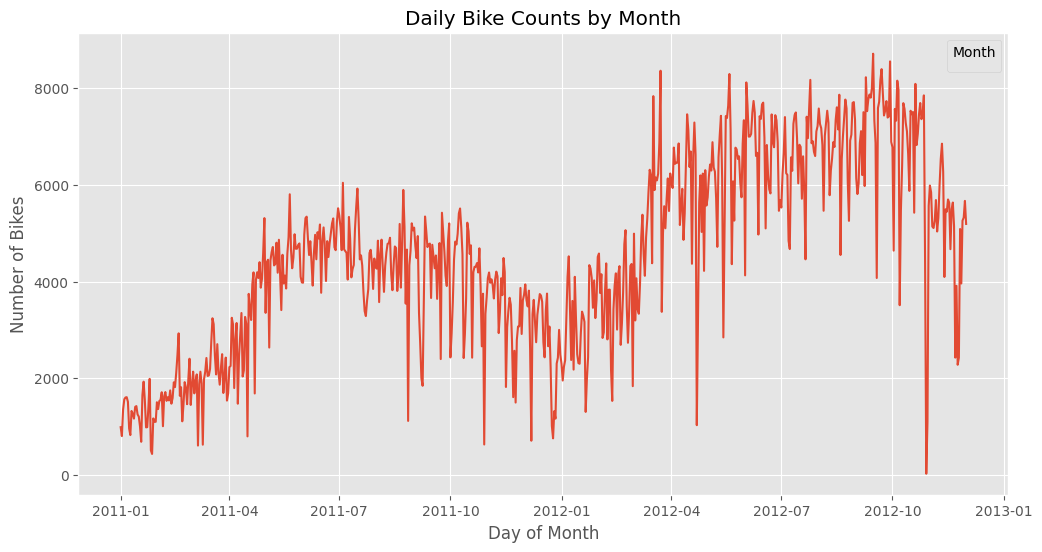

In [158]:
# # Convert date column to datetime
# df_day['dteday'] = pd.to_datetime(df['date'])


# Convert date column to datetime
df_day['dteday'] = pd.to_datetime(df['dteday'])

# Extract month and day
# df['month'] = df['date'].dt.month
df_day['day'] = df_day['dteday'].dt.day



# Aggregate counts by month and day
# daily_counts = df_day.groupby(['mnth', 'day'])['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_day, x='dteday', y='cnt', 
            #  hue='season', 
            #  palette='tab10'
             )
plt.title('Daily Bike Counts by Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bikes')
plt.legend(title='Month')
plt.show()

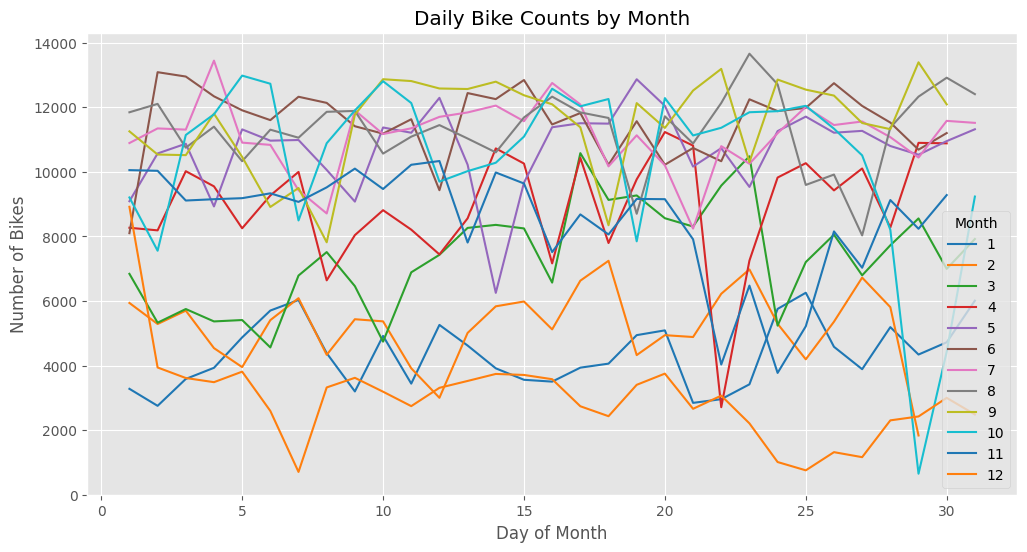

In [159]:
# # Convert date column to datetime
# df_day['dteday'] = pd.to_datetime(df['date'])


# Convert date column to datetime
df_day['dteday'] = pd.to_datetime(df['dteday'])

# Extract month and day
# df['month'] = df['date'].dt.month
df_day['day'] = df_day['dteday'].dt.day



# Aggregate counts by month and day
daily_counts = df_day.groupby(['mnth', 'day'])['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_counts, x='day', y='cnt', hue='mnth', palette='tab10')
plt.title('Daily Bike Counts by Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bikes')
plt.legend(title='Month')
plt.show()


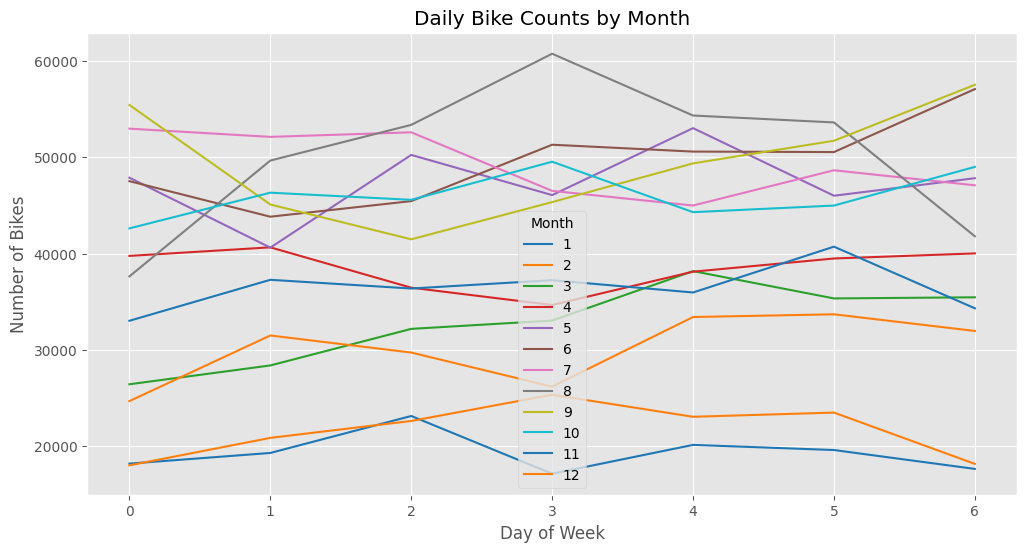

In [160]:
# # Convert date column to datetime
# df_day['dteday'] = pd.to_datetime(df['date'])





# Aggregate counts by month and day
daily_counts = df_day.groupby(['mnth', 'weekday'])['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_counts, x='weekday', y='cnt', hue='mnth', palette='tab10')
plt.title('Daily Bike Counts by Month')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bikes')
plt.legend(title='Month')
plt.show()


In [161]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,bikes_cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,82.0,1.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,67.0,2.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,112.0,3.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,130.0,4.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,133.0,5.0


**Answers / comments / reasoning:**

-

## Part 3 - Building prediction models

**Tasks:**
1. Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models, and explain your choice.
2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn. 
3. Report the value of the chosen test metric on the provided data. 

In [162]:
# TODO: your code comes here

In [163]:
# Set an experiment name (optional, but recommended)
mlflow.set_experiment("My_Local_Regression_Project")

# 1. Start an MLflow run
with mlflow.start_run():
    # Define and train your model
    params = {"fit_intercept": True}
    lr = LinearRegression(**params)
    # Assume X, y are your features and target
    # lr.fit(X_train, y_train) 
    
    # Placeholder for model training and metric calculation
    mse = 0.5  # Example metric
    
    # 2. Log parameters
    mlflow.log_params(params)
    
    # 3. Log metrics
    mlflow.log_metric("mse", mse)
    
    # 4. Log the model artifact
    # mlflow.sklearn.log_model(lr, "model")
    
    print(f"MLflow Run ID: {mlflow.active_run().info.run_id}")

/Users/patanwalah/Documents/Interviews/task/data-science-task/.venv/lib/python3.11/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/12/01 16:09:30 INFO mlflow.tracking.fluent: Experiment with name 'My_Local_Regression_Project' does not exist. Creating a new experiment.


MLflow Run ID: 2569ab2c97624b0aaecb1a29f8ed0e1a


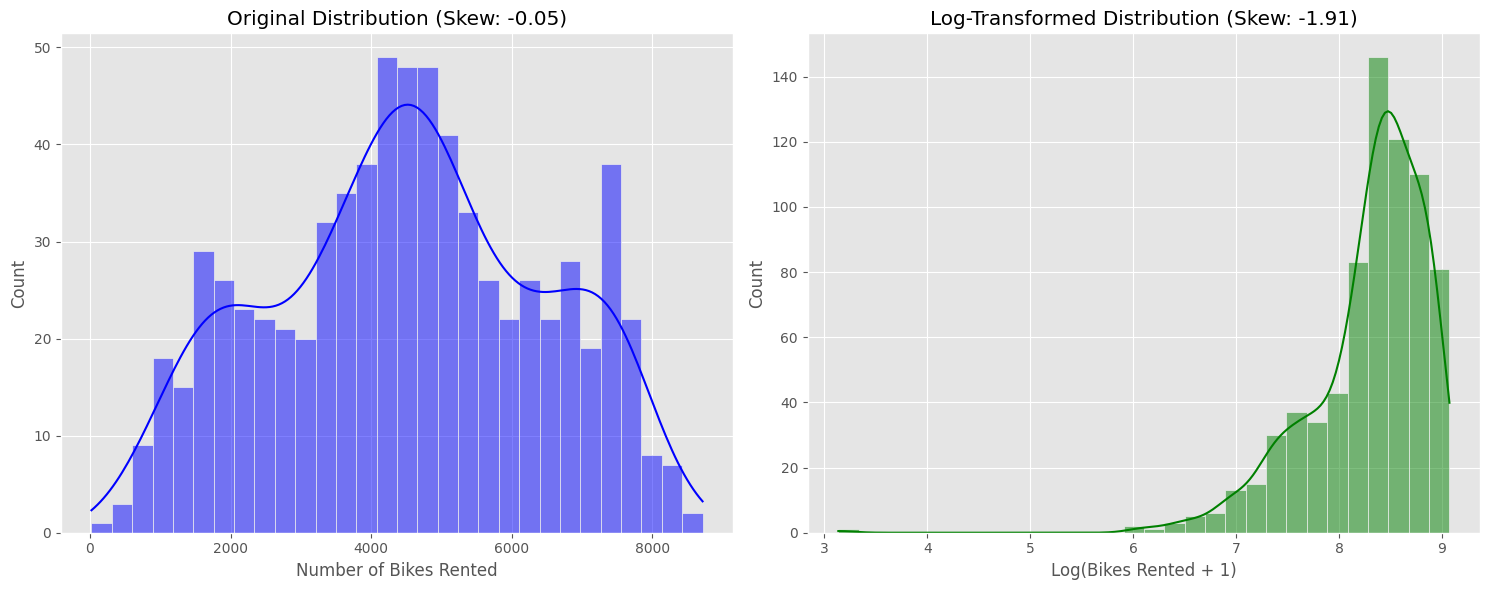

--- DIAGNOSTIC REPORT ---
Original Skewness: -0.0474
Verdict: Low Skew / Normal-like.
Recommendation: Standard RMSE or MAE is safe to use.


In [164]:
from scipy.stats import skew


target_col = 'cnt'

# 1. Setup the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 2. Plot Original Distribution
sns.histplot(df_day[target_col], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title(f'Original Distribution (Skew: {df_day[target_col].skew():.2f})')
axes[0].set_xlabel('Number of Bikes Rented')

# 3. Plot Log-Transformed Distribution
# We use log1p (log(x+1)) to handle zero values safely
log_target = np.log1p(df_day[target_col])
sns.histplot(log_target, bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title(f'Log-Transformed Distribution (Skew: {log_target.skew():.2f})')
axes[1].set_xlabel('Log(Bikes Rented + 1)')

plt.tight_layout()
plt.show()

# 4. Textual Interpretation
skew_val = df_day[target_col].skew()
print(f"--- DIAGNOSTIC REPORT ---")
print(f"Original Skewness: {skew_val:.4f}")
if skew_val > 1:
    print("Verdict: High Right Skew. The data is likely Poisson/Count based.")
    print("Recommendation: Use RMSLE or train your model on log-transformed target (Log + RMSE).")
else:
    print("Verdict: Low Skew / Normal-like.")
    print("Recommendation: Standard RMSE or MAE is safe to use.")

### Prediction model

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [172]:
print(df_day.columns)
df_day.info()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'bikes_cnt', 'day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      701 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64    

In [169]:
df_day.head()


min_values = df_day['dteday'].min()
max_values = df_day['dteday'].max()

print(min_values, max_values)


2011-01-01 00:00:00 2012-12-01 00:00:00


In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# MLflow imports
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature
import os

In [ ]:
EXPERIMENT_NAME = "Demand_Prediction_Experiment"
mlflow.set_experiment(EXPERIMENT_NAME)

def train_random_forest_model(n_estimators, max_depth, max_features):

    # Start a new MLflow run for this specific model configuration
    # The 'with mlflow.start_run():' block ensures the run is closed automatically.
    with mlflow.start_run():

        X = df.drop('demand', axis=1)
        y = df['demand']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # --- B. Model Training ---
        print("2. Training Random Forest Regressor...")
        rf_model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            random_state=42
        )
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)

        # --- C. Evaluation Metrics (RMSE and MAE) ---
        print("3. Calculating metrics (RMSE, MAE)...")
        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        # Calculate R-squared for completeness
        r2 = r2_score(y_test, y_pred)

        print(f"   RMSE: {rmse:.4f}")
        print(f"   MAE: {mae:.4f}")

        # --- D. MLflow Logging ---
        print("4. Logging parameters, metrics, and model to MLflow...")

        # 1. Log Parameters (Hyperparameters)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("max_features", max_features)
        
        # 2. Log Metrics (RMSE and MAE are the required metrics)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2_score", r2)
        
        # 3. Log the Model
        # Infer the model signature for deployment traceability
        signature = infer_signature(X_train, rf_model.predict(X_train))

        mlflow.sklearn.log_model(
            sk_model=rf_model,
            artifact_path="random_forest_model", # Directory name within the run artifact storage
            signature=signature,
            registered_model_name="DemandPredictor_RF" # Optional: Register in the Model Registry
        )

        print("\nMLflow run completed successfully. View results at http://localhost:5000")

**Answers / comments / reasoning:**

-

## Part 4 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.